## [作業重點]
清楚了解 L1, L2 的意義與差異為何，並了解 LASSO 與 Ridge 之間的差異與使用情境

## 作業

請閱讀相關文獻，並回答下列問題

[脊回歸 (Ridge Regression)](https://blog.csdn.net/daunxx/article/details/51578787)
[Linear, Ridge, Lasso Regression 本質區別](https://www.zhihu.com/question/38121173)

1. LASSO 回歸可以被用來作為 Feature selection 的工具，請了解 LASSO 模型為什麼可用來作 Feature selection
2. 當自變數 (X) 存在高度共線性時，Ridge Regression 可以處理這樣的問題嗎?


1.

LASSO是L1正則，Ridge是L2正則。

而L1正則與L2正則的不同就在於L1在和每個坐標軸相交的地方都有“角”出現，而目標函數的測地線除非位置擺得非常好，大部分時候都會在角的地方相交。

注意到在角的位置就會產生稀疏性，而更高維的時候除了角點以外，還有很多邊的輪廓也是既有很大的概率成為第一次相交的地方，又會產生稀疏性。

L1會趨向於產生少量的特徵，而其他的特徵都是0，而L2會選擇更多的特徵，這些特徵都會接近於0。Lasso在特徵選擇時候非常有用，而Ridge就只是一種規則化而已。

2.

脊迴歸是一種修改最小平方法，允許有偏估計量，進而改善多元共線性的方法

假設真實值為β，不偏估計式所求得統計量為b，有偏估計式所求得統計量為bR

而脊迴歸的方程式，是在原先普通最小平方法【(X’X)b=X’Y】的標準方程式中，加入一個偏化常數（biasing constant）c，c≧0，
所得脊標準化迴歸方程式為（rXX+cI）bR = rYX。

脊迴歸分析在進行時，由小到大代入不同的c值，去檢視每次的估計結果是否比普通最小平方估計量b有更小的總均方誤差，雖然c值越大可得到更小的總均方誤差，但c值越大會使得估計結果的偏誤不斷擴大，因此c值並沒有最佳解答，建議會同時使用脊跡（ridge trace）與變異數膨脹因子（VIF）作為判斷偏化常數的依據。

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
X = 1. / (np.arange(1, 6) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)
print(X)

[[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]
 [0.16666667 0.14285714 0.125      0.11111111 0.1       ]
 [0.14285714 0.125      0.11111111 0.1        0.09090909]
 [0.125      0.11111111 0.1        0.09090909 0.08333333]
 [0.11111111 0.1        0.09090909 0.08333333 0.07692308]
 [0.1        0.09090909 0.08333333 0.07692308 0.07142857]]


In [12]:
# alpha 取值为10^（-10）到10^（-2）之间的连续的200个值
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)
print(alphas)

[1.00000000e-10 1.09698580e-10 1.20337784e-10 1.32008840e-10
 1.44811823e-10 1.58856513e-10 1.74263339e-10 1.91164408e-10
 2.09704640e-10 2.30043012e-10 2.52353917e-10 2.76828663e-10
 3.03677112e-10 3.33129479e-10 3.65438307e-10 4.00880633e-10
 4.39760361e-10 4.82410870e-10 5.29197874e-10 5.80522552e-10
 6.36824994e-10 6.98587975e-10 7.66341087e-10 8.40665289e-10
 9.22197882e-10 1.01163798e-09 1.10975250e-09 1.21738273e-09
 1.33545156e-09 1.46497140e-09 1.60705282e-09 1.76291412e-09
 1.93389175e-09 2.12145178e-09 2.32720248e-09 2.55290807e-09
 2.80050389e-09 3.07211300e-09 3.37006433e-09 3.69691271e-09
 4.05546074e-09 4.44878283e-09 4.88025158e-09 5.35356668e-09
 5.87278661e-09 6.44236351e-09 7.06718127e-09 7.75259749e-09
 8.50448934e-09 9.32930403e-09 1.02341140e-08 1.12266777e-08
 1.23155060e-08 1.35099352e-08 1.48202071e-08 1.62575567e-08
 1.78343088e-08 1.95639834e-08 2.14614120e-08 2.35428641e-08
 2.58261876e-08 2.83309610e-08 3.10786619e-08 3.40928507e-08
 3.73993730e-08 4.102658

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  from ipykernel import kernelapp as app


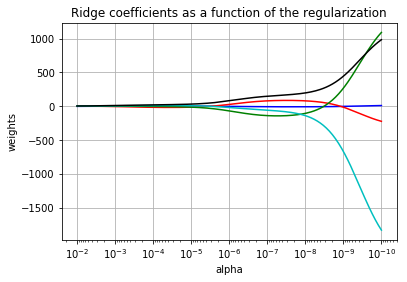

In [13]:
# 初始化一个Ridge Regression
clf = linear_model.Ridge(fit_intercept=False)

# 参数矩阵，即每一个alpha对于的参数所组成的矩阵
coefs = []
# 根据不同的alpha训练出不同的模型参数
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)

# 获得绘图句柄
ax = plt.gca()
# 参数中每一个维度使用一个颜色表示
ax.set_color_cycle(['b', 'r', 'g', 'c', 'k'])

# 绘制alpha和对应的参数之间的关系图
ax.plot(alphas, coefs)
ax.set_xscale('log')    #x轴使用对数表示
ax.set_xlim(ax.get_xlim()[::-1])  # 将x轴反转，便于显示
plt.grid()
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()
